# Exercise 3, Task 2. 1
This is a short example computation with a basic visualization in python.
The code is not intended to be fast or efficient but rather to be easy to understand.

### Imports

We first import the necessary python packages for our computation.
In this example we use the packages:
* numpy - standard package for scientific computing
* matplotlib - standard package for visualization
* seaborn - package that improves the visualization (not necassary)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', context='poster')

### Data Visualization
We initialize our dataset and centroids as numpy arrays and use a scatter plot for visualization.

We have N=12 samples, K=3 centroids and M=2 features.

Thus, the dataset array is of shape (N, M)=(12,2) and the centroid array of shape (K,M)=(3,2).

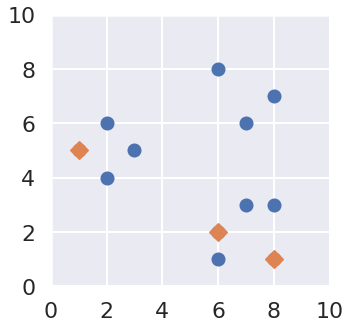

In [2]:
data = np.array([[1, 6, 8, 3, 2, 2, 6, 6, 7, 7, 8, 8], [5, 2, 1, 5, 4, 6, 1, 8, 3, 6, 3, 7]]).T
centroids = data[:3]

f, ax = plt.subplots(figsize=(5,5))
plt.scatter(x=data[:,0], y=data[:,1])
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='D')

plt.xticks(np.arange(0,11, 2))
plt.yticks(np.arange(0,11, 2))
plt.show()

### K-Means: Update and assignment
We now define a single function that takes the dataset and centroids and returns a new set of centroids and a categorical assignment mask.

In [3]:
def get_new_centroids(dataset: np.ndarray, centroids_old: np.ndarray):
    """Performs a single iteration of the K-Means algorithm.
    
    Parameters
    ----------
    dataset: np.ndarray
        2-dimensional array of shape (N, M)
    centroids_old: np.ndarray
        2-dimensional array of shape (K, M)
    
    Returns
    -------
    centroids_new, assignment: Tuple(np.ndarray, np.ndarray)
        Tuple of: New centroid array of shape (K, M) and the categorical assignment mask of shape (N,)
    """
    distances = np.sqrt(np.sum((dataset[None] - centroids_old[:,None]) ** 2, axis=-1))
    assignment = distances.argmin(axis=0)
    
    centroids_new = []
    for i in range(centroids_old.shape[0]):
        centroids_new.append(dataset[assignment == i].mean(axis=0))
    return np.array(centroids_new), assignment

### K-Means Iteration
We now perform 5 steps of the K-Means algorithm.

Usually you perform it until convergence but we want to keep it simple and we know that it converges before ;)

We store the results of the iterations in a simple list to keep track of the changes.

In [4]:
c = centroids
assignment_history, centroids_history = [], [c]
for i in range(5):
    c, a = get_new_centroids(data, c)
    assignment_history.append(a)
    centroids_history.append(c)

### Visualization of the result
We now visualize the result after each iteration.
The initial condition (before updating any centroids) is shown in step 0.

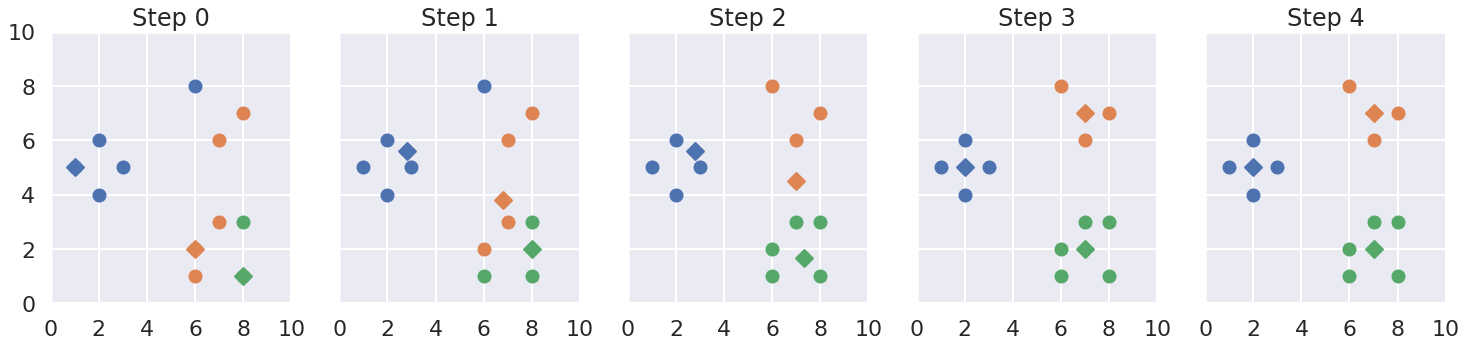

In [5]:
f, ax = plt.subplots(figsize=(25, 5), ncols=5, sharex=True, sharey=True)

for step_idx in range(len(assignment_history)):
    for cluster_idx in range(len(centroids)):
        ax[step_idx].scatter(x=data[assignment_history[step_idx] == cluster_idx, 0],
                             y=data[assignment_history[step_idx] == cluster_idx, 1],
                             color=f'C0{cluster_idx}')
        
        ax[step_idx].scatter(x=centroids_history[step_idx][cluster_idx, 0],
                             y=centroids_history[step_idx][cluster_idx, 1],
                             marker='D',
                             color=f'C0{cluster_idx}')
        
        ax[step_idx].set_title(f'Step {step_idx}')

for a in ax:
    a.set_xticks(np.arange(0,11,2))
    a.set_yticks(np.arange(0,11,2))

plt.savefig('ex321.pdf')